In [23]:
#imports
import random
import networkx as nx
import numpy as np
import time
import scipy as sp
import math
import matplotlib.pyplot as plt
import copy

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler 



#methods for defining datasets
def big_square_tuples_list(n):
    
    tuples = []
    for i in range (n):
        a = random.randrange(0, 1000)
        b = random.randrange(0, 1000)
        tuples.append((a,b))
        
    return tuples
    
def random_tuple_groups_list(nodes, groups):
    
    tuples = []
    for j in range(0,groups):
        for i in range(int(nodes/groups)):
            a = random.randrange(j*groups*100 -350,j*groups*100)
            b = random.randrange(j*groups*100 -350,j*groups*100)
            tuples.append((a,b))
            
    return tuples
            
def circle_in_circle_tuples_list(nodes):
    tuples = []
    
    X, Y = datasets.make_circles(
    n_samples=nodes, factor=0.5, noise=0.05, random_state=30
    )
    
    
    for x in X:
        x[0] = x[0]*657
        x[1] = x[1]*657
        tuples.append((x[0],x[1]))
    return tuples

def double_horseshoes_tuples_list(nodes):
    tuples = []
    
    X,Y = datasets.make_moons(
    n_samples=nodes, noise=0.05, random_state=30
    )
    
    for x in X:
        x[0] = x[0]*750
        x[1] = x[1]*750
        tuples.append((x[0],x[1]))
        
    return tuples
        
    
def lines_tuples_list(nodes):
    points = []
    
    for i in range(0,nodes,10):
        points.append((i,i))
        points.append((i+100,i-100))
        points.append((i+200, i-200))
        points.append((i+300, i-300))
        points.append((i+400, i-400))
        
    return points

#DBScan Method
def DBScan(graph,bag):
    #add all nodes to a bag
    for node in graph.nodes():
        bag.add(node)
    #mark all nodes unvisited
    visited = {node:0 for node in graph.nodes() }
    neighborhood = {node:0 for node in graph.nodes() }
    neighborhood_counter = 0
    
    while len(bag.items) > 0:
        #remove node from bag
        new_Node= bag.get()
        if visited[new_Node] == 0:
            #mark node as visited
            visited[new_Node] = 1
            
            #search list of nodes for nodes within given radius
            neighbors = findNeighbors(graph, new_Node)
                #if neighbor count is high enough:
            if len(neighbors) > 3:
                # define a new neighborhood:
                neighborhood_counter += 1
                neighborhood[new_Node] = neighborhood_counter
                
                #make new edges connecting node to neighbors
                for node in neighbors:
                    graph.add_edge(new_Node,node)
                    buildNeighborhood(graph, node, neighborhood_counter, neighborhood, visited) 
                    
    for edge in graph.edges():
        if neighborhood[edge[0]] != neighborhood[edge[1]]:
            graph.remove_edge(edge[0],edge[1])
                    
    return neighborhood 

 #methods used in DBScan Method
def findNeighbors(graph, new_Node):
    neighbors = []
    for node in graph.nodes():
        distance = np.sqrt(np.square(new_Node[0] - node[0]) + np.square(new_Node[1] - node[1]))
        if distance < 50 and distance != 0:
            neighbors.append(node)
    return neighbors

def buildNeighborhood(graph, node, neighborhood_Counter, neighborhood, visited):
    neighborhood[node] = neighborhood_Counter
    neighbors = findNeighbors(graph, node)
    if len(neighbors) > 3:
        for neighbor in neighbors:
            if (node,neighbor) not in graph.edges():
                graph.add_edge(node, neighbor)
                buildNeighborhood(graph, neighbor, neighborhood_Counter, neighborhood, visited)
    visited[node] = 1
    
class myQueue():
    
    def __init__(self):
        self.items = []
        
    def get(self):
        return self.items.pop(0)
    
    def add(self, item):
        self.items.append(item)
        
#methods used by spectral clustering method
def findNeighbors(graph, new_Node):
    neighbors = []
    for node in graph.nodes():
        distance = np.sqrt(np.square(new_Node[0] - node[0]) + np.square(new_Node[1] - node[1]))
        if distance < 50 and distance != 0:
            neighbors.append(node)
    return neighbors


def connectByProximity(graph,bag):
    #add all nodes to a bag
    for node in graph.nodes():
        bag.add(node)
    #mark all nodes unvisited
    visited = {node:0 for node in graph.nodes() }
    
    while len(bag.items) > 0:
        #remove node from bag
        new_Node= bag.get()
        if visited[new_Node] == 0:
            #mark node as visited
            visited[new_Node] = 1
            
            #search list of nodes for nodes within given radius
            neighbors = findNeighbors(graph, new_Node)
                #if neighbor count is high enough:
            if len(neighbors) > 0:
                #make new edges connecting node to neighbors
                for node in neighbors:
                    graph.add_edge(new_Node,node)
                    buildNeighborhood(graph, node, visited) 
                    
    return graph

def getAdjacencyMatrix(graph, bag):
    graph = connectByProximity(graph, bag)
    matrix = nx.to_numpy_array(graph)
    return(matrix)

class myQueue():
    
    def __init__(self):
        self.items = []
        
    def get(self):
        return self.items.pop(0)
    
    def add(self, item):
        self.items.append(item)
        
#code for k_means method for final step of spectral clustering

def init_centroids(k, data):
    centroids = []
    i = 0
    while i < k:
        centroid = random.choice(data)
        centroids.append(centroid)
        i+=1
    return centroids

def distance(X, Y):
    #X and Y are both arrays
    dist = np.square(np.sum((X-Y)**2))
    return dist

def get_dist(pair):
    return pair[0]

def mean_tuple(tuple_list):
    
    avg_x = sum(map(lambda x: x[0], tuple_list)) / len(tuple_list)
    avg_y = sum(map(lambda x: x[1], tuple_list)) / len(tuple_list)
    res = (avg_x, avg_y)
    return res
    
def create_cluster_lists(k):
    i = 0
    clustersclusters = []
    while i < k:
        cluster = []
        clustersclusters.append(cluster)
        i += 1
    return clustersclusters

def random_list_of_points_generator(n_tuples, val_limit):
    our_list = []
    for x in range(n_tuples):
        r1 = random.randint(1,val_limit)
        r2 = random.randint(1,val_limit)
        point = (r1, r2)
        our_list.append(point)
    return our_list

def visualize_clusters(c_lists):
    
    x = [None]*len(c_lists)
    y = [None]*len(c_lists)
    
    for i in range(len(c_lists)):
        
        xv = []
        yv = []
        
        for j in range(len(c_lists[i])):     
            
            xv.append(c_lists[i][j][0])
            yv.append(c_lists[i][j][1])
            
        x[i] = xv
        y[i] = yv
        
        plt.scatter(xv,yv)
    
    plt.show()
    
    #print(x)
    return x

def k_means_v1(point_list, k):
    #need to randomly assign he centroids at the beginning
    #out point_list is like [(x1,y1), (x2,y2), ... (xn,yn)]
    centroids = []
    centroids += random.sample(point_list, k)
    
    #ok i have some centroids now
    #we need to make a list called assignments for assigned cluster for each point
    #each index represents the same index point in point_list i.e. [...(x4,y4)...] will have assignment at asn[3].
    lst = [None]*(len(point_list))
    
    #i think here is where we do a while loop a couple times to assign/reassign clusters and centroids so... here goes
    iterations = 0
    start_time = time.time()
    while iterations < 10:
        for i in range(len(point_list)):
            point = point_list[i]
            point_dists = []
            label = 0
            
            for centroid in centroids:

                a = point[0]-centroid[0]
                b = point[1]-centroid[1]
                sum = a**2 + b**2
                dist = math.sqrt(sum)
                point_dists.append((dist, label))
                label += 1

            sorted_by_distance = sorted(point_dists, key = get_dist)
            #now we have a list of length k where the shortest distance is at the 0th index, with label of k closest centroid
            #need to assign the point to the appropriate centroid in lst
            lst[i] = sorted_by_distance[0][1]
         #cool so all of the points are now assigned to an initial cluster
         #now we need to calculate the mean distance between all the points in our clusters and update the centroid to be that new point
         #keep doing all this a certain number of times for now (eventually until the distance between old_c and new_c becomes very small i.e. convergent)
        cluster_lists = create_cluster_lists(k)
        lmao = k
        lamo = 0
        #need a loopdeeloop to assign points to their clusters for mean analysis based on lst value of index
        for i in lst:
            cluster_lists[i].append(point_list[lamo])
            lamo += 1

        if iterations == 9:
            visualize_clusters(cluster_lists)
            
        for x in range(k):
            centroids[x] = mean_tuple(cluster_lists[x])

        #print(centroids)
        iterations += 1
    
    
    clusters = {point:0 for point in point_list}
    for i in range(len(cluster_lists)):
        for point in cluster_lists[i]:
            clusters[point] = i
    
    return clusters


def spectralClustering(graph, k):
    
    #get adjacency matrix for graph
    Amatrix = getAdjacencyMatrix(graph, myQueue())
    n, m = Amatrix.shape

    #make Laplacian Matrix
    Dmatrix = np.diag(Amatrix.sum(axis=1))
    Lmatrix = Dmatrix - Amatrix

    #get the eigenvalues and eigenvectors
    eigvals, eigvects = np.linalg.eig(Lmatrix)
    eigvals = np.real(eigvals)
    eigvects = np.real(eigvects)
    
 
    #take second and third eigenvector for two clusters
    feature_matrix = eigvects[:,:2]
   
    y= []
    for i in range(len(graph.nodes())):
            y.append((feature_matrix[i,0],feature_matrix[i,1]))
    
    #take decomposition of eigenvectors and assign to each node in graph
    decomp = {node:0 for node in graph.nodes()}
    nodes = list(graph.nodes())
    for i in range(len(graph.nodes())):
        decomp[nodes[i]] = y[i]     
        
    
    #cluster points based on decomposition of eigenvector using k means
    clusters = k_means_v1(y, k)

                   
    #take clusters dictionary and assign to nodes dictionary
    for node in decomp:
        decomp[node] = clusters[decomp[node]]
        
    

    nx.draw_networkx(gr, {node:node for node in gr.nodes()}, 
                 node_color = [decomp[node] for node in gr.nodes()],
                 with_labels = False, 
                 node_size = 5)
    
    return decomp

def hierarchical_cluster(tuples, linkage_func):
    
    #make a matrix to keep track of euclidean distances
    dist_matrix = []
    #Not pretty, but I know it works to make the right size matrix
    clusters = copy.deepcopy(tuples)
    for i in clusters:
        row = []
        for j in tuples:
            row.append(0)
        dist_matrix.append(row)
    
    #populate the matrix
    for cord1 in clusters:
        for cord2 in tuples:
            index1 = tuples.index(cord1)
            index2 = tuples.index(cord2)
            dist_matrix[index1][index2]=math.dist(cord1, cord2)
            
    #Create a graph to record the hierarchy
    gr = nx.Graph()
    graph_build = []
   
    #loop through, make clusters and add to graph
    while True:
        #find smallest distance, record clusters
        smallest = 10**1000
        
        closest_clusters = [0,0]
        for item in dist_matrix:
            for distance in item:
                if distance < smallest and distance != 0:
                    #record distance, and clusters attached
                    smallest = distance
                    closest_clusters[0] = clusters[dist_matrix.index(item)]
                    closest_clusters[1] = clusters[item.index(distance)]
        
        #update the 'clusters' list
        clusters.remove(closest_clusters[0])
        clusters.remove(closest_clusters[1])
        add_cluster=[]
        if type(closest_clusters[0]) is tuple:
            add_cluster.append(closest_clusters[0])
        else:
            for i in closest_clusters[0]:
                add_cluster.append(i)
        if type(closest_clusters[1]) is tuple:
            add_cluster.append(closest_clusters[1])
        else:
            for i in closest_clusters[1]:
                add_cluster.append(i)
        clusters.append(add_cluster)
        
        #I'll need the order to build the graph at the end
        graph_build.append(add_cluster)
        
        #recalculate matrix using passed function
        dist_matrix = linkage_func(clusters)
        #end loop if clusters is one big element
        if len(clusters)<2:
            break
    
    #Time to build the graph and draw/return it
    seen = {}
    hierarchy_counter=0
    for item in graph_build:
        hierarchy_counter += 1
        if len(item) == 2:
            #add the nodes/edges and update the dictionary
            gr.add_node(item[0])
            gr.add_node(item[1])
            gr.add_node(hierarchy_counter)
            gr.add_edge(item[0],hierarchy_counter)
            gr.add_edge(item[1],hierarchy_counter)
            seen[item[0]]=hierarchy_counter
            seen[item[1]]=hierarchy_counter
        else:
            #Multiple items, we have to check for which have node parents
            gr.add_node(hierarchy_counter)
            for cluster in item:
                if cluster not in seen.keys():
                    gr.add_node(cluster)
                    gr.add_edge(cluster, hierarchy_counter)
                    seen[cluster]=hierarchy_counter
                else:
                    node_connection=seen[cluster]
                    gr.add_edge(node_connection, hierarchy_counter)
                    seen[cluster]=hierarchy_counter
    nx.draw(gr, with_labels=True)
    return graph_build

def single_linkage(cluster_list):
    double_list=copy.deepcopy(cluster_list)
    
    #make a matrix to keep track of euclidean distances
    dist_matrix = []
    #Not pretty, but I know it works to make the right size matrix
    for i in cluster_list:
        row = []
        for j in double_list:
            row.append(0)
        dist_matrix.append(row)
    #quadruple for loop, for ensuring coverage... we want the smallest euclidean distance
    for cluster in cluster_list:
        for other_cluster in double_list:
            #Update one matrix value per cluster comparison
            smallest=1000
            if cluster_list.index(cluster) != double_list.index(other_cluster):
                #They could be single point tuple clusters or multiple point clusters
                if type(cluster) is list and type(other_cluster) is list:
                    for i in cluster:
                        for j in other_cluster:
                            distance=math.dist(i,j)
                            if distance<smallest:
                                smallest=distance
                    dist_matrix[cluster_list.index(cluster)][double_list.index(other_cluster)]=smallest
                    
                elif type(cluster) is not list and type(other_cluster) is not list:
                    dist_matrix[cluster_list.index(cluster)][double_list.index(other_cluster)]=math.dist(cluster, other_cluster)
                    
                elif type(cluster) is list and type(other_cluster) is not list:
                    for i in cluster:
                        distance=math.dist(i,other_cluster)
                        if distance<smallest:
                            smallest=distance
                    dist_matrix[cluster_list.index(cluster)][double_list.index(other_cluster)]=smallest
                
                elif type(cluster) is not list and type(other_cluster) is list:
                    for j in other_cluster:
                        distance=math.dist(cluster,j)
                        if distance<smallest:
                            smallest=distance
                    dist_matrix[cluster_list.index(cluster)][double_list.index(other_cluster)]=smallest
    return dist_matrix


<function matplotlib.pyplot.show(close=None, block=None)>

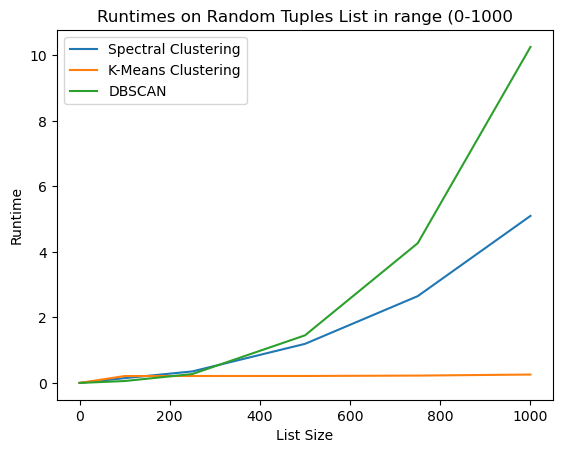

In [31]:
listSizes = [0,100, 250, 500, 750, 1000]
SCtimes = [0,0.1462, 0.35099,1.1929,2.65,5.10]
KMtimes = [0,0.20975422859191895, 0.2115631103515625, 0.21209049224853516, 0.2237842082977295, 0.255840539932251]
DBtimes = [0,0.0578,0.27102,1.453,4.267,10.2585]

fig1=plt.figure()
plt.plot(listSizes, SCtimes,label='Spectral Clustering')
plt.plot(listSizes, KMtimes,label='K-Means Clustering')
plt.plot(listSizes, DBtimes,label='DBSCAN')
plt.ylabel('Runtime')
plt.xlabel('List Size')
plt.title('Runtimes on Random Tuples List in range (0-1000)')
plt.legend()
plt.show